In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv('data_youtube.csv', header = 0)
df.head(3)

,video_channelId,video_channelTitle,video_channelSubscriber,video_id,video_title,video_publishedAt,video_description,video_thumbnails,video_tags,video_categoryId,video_viewCount,video_likeCount,video_commentCount,video_duration_teaser,video_id_mv_official,video_title_mv_official,video_publishedAt_mv_official,video_duration_mv_official,video_viewCount_mv_official,total_hour_mv_published
0,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,CmaEPDdUXcQ,"Stray Kids ""CASE 143"" M/V Teaser 2",2022-10-03 14:59:57+00:00,"Stray Kids(스트레이 키즈) ""CASE 143"" M/V Teaser 2\n\...",https://i.ytimg.com/vi/CmaEPDdUXcQ/default.jpg,"['JYP Entertainment', 'JYP', 'Stray Kids', '스트...",10,2197857.0,353176.0,12229.0,PT22S,jYSlpC6Ud2A,"Stray Kids ""CASE 143"" M/V",2022-10-07 03:59:56+00:00,PT3M41S,51701920.0,44844.0
1,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,PlU26C7FDFk,"Stray Kids ""CASE 143"" M/V Teaser 1",2022-10-02 14:59:58+00:00,"Stray Kids(스트레이 키즈) ""CASE 143"" M/V Teaser 1\n\...",https://i.ytimg.com/vi/PlU26C7FDFk/default.jpg,"['JYP Entertainment', 'JYP', 'Stray Kids', '스트...",10,1360663.0,289305.0,7273.0,PT22S,jYSlpC6Ud2A,"Stray Kids ""CASE 143"" M/V",2022-10-07 03:59:56+00:00,PT3M41S,51701920.0,44844.0
2,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,25900000,mEJhsPDa_Dg,"NMIXX ""DICE"" M/V Teaser 2",2022-09-16 15:00:52+00:00,"NMIXX ""DICE"" M/V Teaser 2\n\nNMIXX Official Yo...",https://i.ytimg.com/vi/mEJhsPDa_Dg/default.jpg,"['JYP Entertainment', 'JYP', 'NMIXX', '엔믹스', '...",10,2496268.0,229744.0,5620.0,PT24S,p1bjnyDqI9k,"NMIXX ""DICE"" M/V",2022-09-19 09:00:23+00:00,PT3M19S,60361668.0,70463.0


#### Subcriber of each channel

In [3]:
df_channel = pd.DataFrame(df['video_channelTitle'].unique(), columns = ['channel'])
df_channel['subcribers']=0
for x in df_channel['channel']:
    df_channel.loc[df_channel['channel']==x, 'subcribers'] = df.loc[df['video_channelTitle']==x, 'video_channelSubscriber'].max()
df_channel

,channel,subcribers
0,JYP Entertainment,25900000
1,HYBE LABELS,68800000
2,BIGBANG,14900000
3,BLACKPINK,82800000
4,SECHSKIES,545000
5,SMTOWN,31000000
6,WINNER,4000000
7,iKON,8750000
8,TREASURE (트레저),6520000
9,THEBLACKLABEL,2670000


C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_4836/2044901250.py:6: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_4836/2044901250.py:6: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  plt.tight_layout()
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_4836/2044901250.py:6: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\

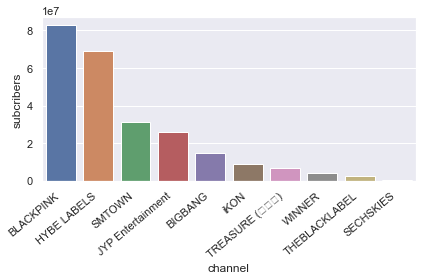

In [4]:
# plot bar chart
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="channel", y="subcribers", data=df_channel.sort_values(by='subcribers', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### Time publish teaser and time publish MV

In [5]:
#2018-07-19 01:00:01+00:00
df_time = pd.DataFrame()
df_time['trailer_time'] = pd.to_datetime(df['video_publishedAt']).dt.hour
df_time['mv_time'] = pd.to_datetime(df['video_publishedAt_mv_official']).dt.hour
df_time

,trailer_time,mv_time
0,14,3
1,14,3
2,15,9
3,15,9
4,15,3
...,...,...
865,15,9
866,3,9
867,3,9
868,2,9


In [6]:
df_test = pd.DataFrame()
df_test['trailer_time'] = df['video_publishedAt_mv_official'].str.split(' ', expand = True)[1].str.split(':', expand = True)[0]
df_test.value_counts()

trailer_time
09              412
15              140
08               85
03               82
04               36
14               19
11               15
01               14
02               14
10               13
07               11
16                7
05                5
12                5
13                5
06                4
21                1
00                1
23                1
dtype: int64

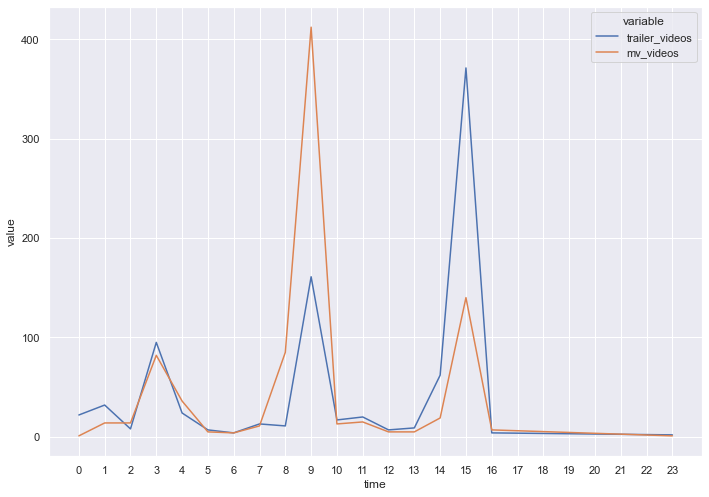

In [7]:
# line chart of time published of trailer and mv
df_trailer_time = pd.DataFrame(df_time.groupby(['trailer_time'], as_index=False)['trailer_time'].agg({'trailer_videos':'count'}))
df_mv_time = pd.DataFrame(df_time.groupby(['mv_time'], as_index=False)['mv_time'].agg({'mv_videos':'count'}))
df_time_merge = pd.merge(df_trailer_time, df_mv_time, left_on='trailer_time', right_on='mv_time')
df_time_merge.drop(['mv_time'], axis=1, inplace=True)
df_time_merge.rename(columns={'trailer_time':'time'}, inplace=True)
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(data=pd.melt(df_time_merge, id_vars=['time'], value_vars=['trailer_videos', 'mv_videos']), x='time', y='value', hue='variable')   
ax.set_xticks(np.arange(0, 24, 1))
plt.show()

C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_4836/2268932548.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)


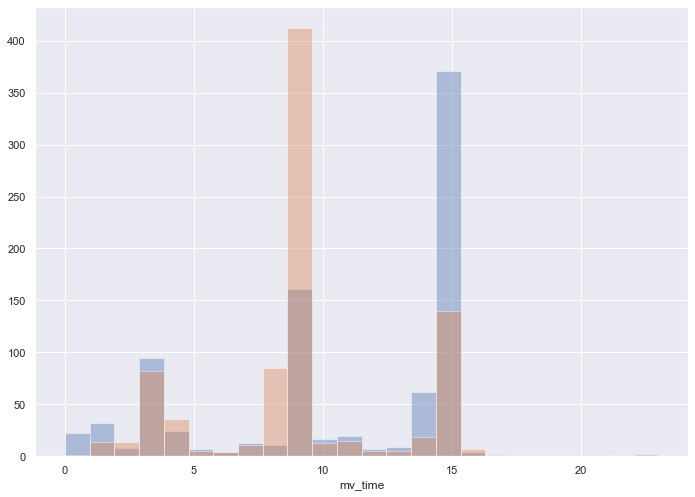

In [8]:
#plot histogram of video_publishedAt and video_publishedAt_mv_official

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
for x in df_time.columns:
    ax = sns.distplot(df_time[x], bins=24, kde=False, rug=False, label=x)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### Total view, like and comment of top 5 video has highest view

In [48]:
df_view = df[['video_title_mv_official','video_viewCount_mv_official','video_duration_mv_official','video_channelSubscriber','video_viewCount']]
# df_view = df_view['video_title_mv_official'].unique().sort_values(by='video_viewCount_mv_official', ascending=False).head(5)
df_view = df_view.sort_values(by='video_viewCount_mv_official', ascending=False).drop_duplicates().head(5)
df_view

,video_title_mv_official,video_viewCount_mv_official,video_duration_mv_official,video_channelSubscriber,video_viewCount
301,BLACKPINK - ‘뚜두뚜두 (DDU-DU DDU-DU)’ M/V,1.975194e+09,PT3M36S,82800000,30430015.0
299,BLACKPINK - 'Kill This Love' M/V,1.691894e+09,PT3M14S,82800000,60838754.0
250,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,1.600783e+09,PT4M13S,68800000,44395270.0
251,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,1.600783e+09,PT4M13S,68800000,35348925.0
220,BTS (방탄소년단) 'Dynamite' Official MV,1.592586e+09,PT3M44S,68800000,74563936.0


c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

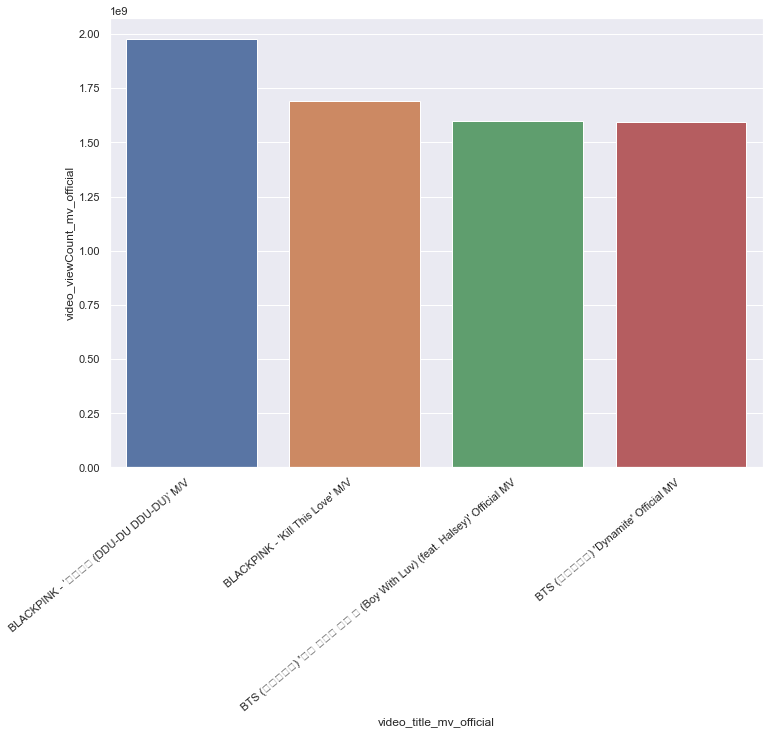

In [49]:
#plot bar chart of top 5 video with highest view count
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.barplot(x="video_title_mv_official", y="video_viewCount_mv_official", data=df_view)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [42]:
#length of top 5 video with highest view count
df_view['video_duration_mv_official'] = df_view['video_duration_mv_official'].str[2].astype(int).add(df_view['video_duration_mv_official'].str[4:6].astype(int).div(60))
#round to 2 decimal places
df_view['video_duration_mv_official'] = df_view['video_duration_mv_official'].round(2)
df_view

,video_title_mv_official,video_viewCount_mv_official,video_duration_mv_official,video_channelSubscriber
301,BLACKPINK - ‘뚜두뚜두 (DDU-DU DDU-DU)’ M/V,1.975194e+09,3.60,82800000
299,BLACKPINK - 'Kill This Love' M/V,1.691894e+09,3.23,82800000
250,BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) (feat....,1.600783e+09,4.22,68800000
220,BTS (방탄소년단) 'Dynamite' Official MV,1.592586e+09,3.73,68800000
258,BTS (방탄소년단) 'DNA' Official MV,1.492380e+09,4.27,68800000


c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\NguyenNam\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core

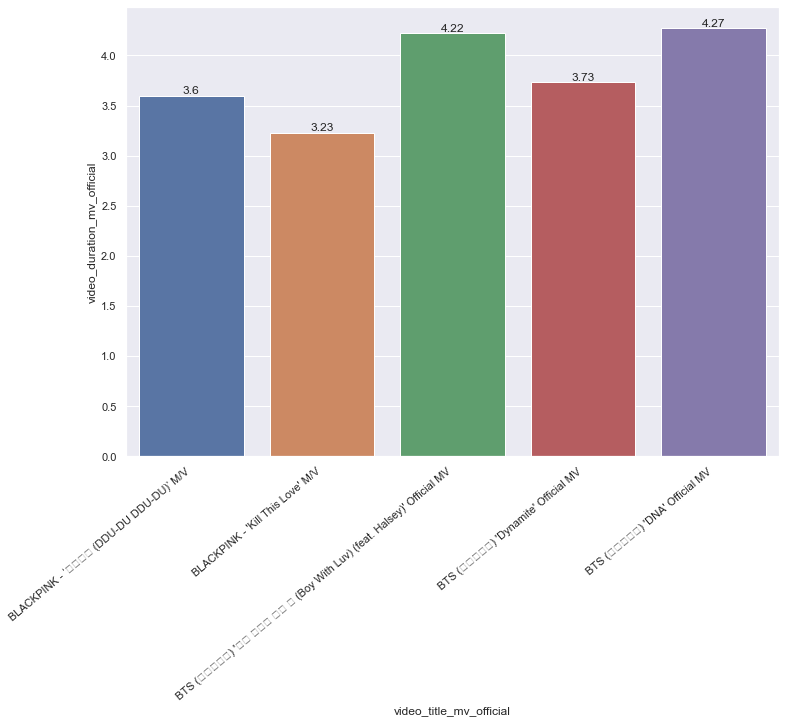

In [47]:
#bar chart of length of top 5 video with highest view count
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="video_title_mv_official", y="video_duration_mv_official", data=df_view)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.bar_label(ax.containers[0])
plt.show()

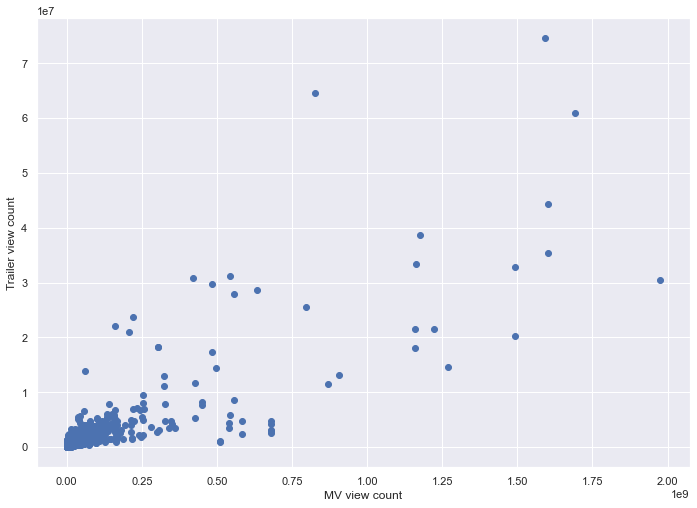

In [61]:
#scatter plot of MV view count and trailer view count
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = df['video_viewCount_mv_official']
y = df['video_viewCount']
plt.scatter(x, y)
# ax.set_xlabel('MV view count')
# ax.set_ylabel('Trailer view count')
plt.xlabel('MV view count')
plt.ylabel('Trailer view count')
plt.show()

#### Distribution of video_viewCount,video_likeCount, video_commentCount using box plot

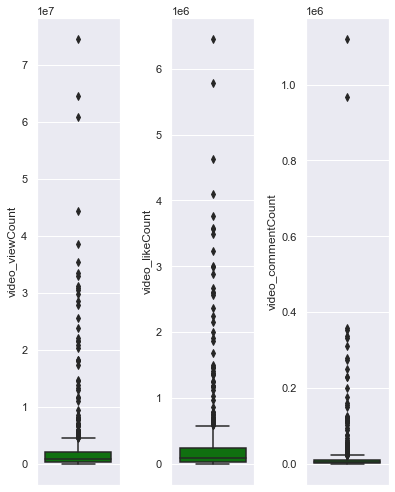

In [9]:
features = ['video_viewCount','video_likeCount','video_commentCount']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout();